In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
def dist(p):
    if isinstance(p, np.ndarray):
        q = np.zeros(len(p))
        j = 0
        while j < len(p):
            if 0 <= p[j] <= 1:
                q[j] = 1
            else:
                q[j] = 0
            j += 1
        return q
    else:
        j = 0
        while j < 1:
            if 0 <= p <= 1:
                return 1
            else:
                return 0
            j += 1
            
def dist_likelihood(p):
    return (p**7) * ((1 - p)**3)

def valor_dist(p):
    return dist_likelihood(p) * dist(p)

def Metropolis(P, delta=0.4, n_samples=10000):
    x = np.zeros((n_samples,))
    x[0] = 0.5
    i = 1
    while i < n_samples:
        P0 = P(x[i-1])
        xf = x[i-1] + delta * 2 * (np.random.rand() - 0.5)
        P1 = P(xf)
        a = np.minimum(1, P1 / P0)
        g = np.random.rand()
        if a > g:
            x[i] = xf
            i += 1
    return x

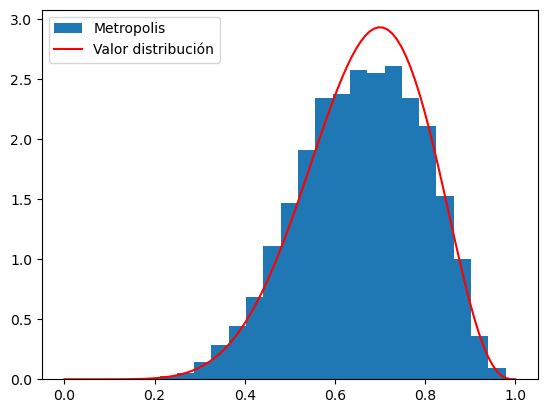

In [37]:
cadena = Metropolis(posterior)

plt.hist(cadena, bins=22, density=True, label="Metropolis")
x0 = np.linspace(0, 1, 100)
y0 = valor_dist(x0)
plt.plot(x0, y0 * 1320, color="red", label="Valor distribución")
plt.legend()
plt.show()